### Proses Pengumpulan Data

In [1004]:
import numpy as np       
import pandas as pd       
import matplotlib.pyplot as plt  
%matplotlib inline

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')   
nltk.download('punkt')      

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yonat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yonat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1005]:
df = pd.read_csv('spam (3).csv')

### EDA

In [1006]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 5572
Jumlah kolom: 2


In [1007]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [1008]:
df.shape

(5572, 2)

In [1009]:
styled_df = df.head(7)
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#0000FF")]}
])
styled_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.


In [1010]:
df.rename(columns = {'Category': 'Kategori', 'Message': 'IsiPesan'}, inplace = True)

In [1011]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Kategori'] = encoder.fit_transform(df['Kategori'])

In [1012]:
styled_df = df.head().style

styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#0000FF"), ('font-weight', 'bold')]}
])

,Kategori,IsiPesan
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [1013]:
df.isnull().sum()

Kategori    0
IsiPesan    0
dtype: int64

In [1014]:
df.duplicated().sum()

415

In [1015]:
df = df.drop_duplicates(keep = 'first')

In [1016]:
df.shape

(5157, 2)

In [1017]:
df.Kategori.value_counts()

Kategori
0    4516
1     641
Name: count, dtype: int64

In [1018]:
values = df['Kategori'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of Non Spam :' ,percentage_0)
print('percentage of Spam :' ,percentage_1)

percentage of Non Spam : 87.5702928058949
percentage of Spam : 12.429707194105099


In [1019]:
df['num_characters'] = df['IsiPesan'].apply(len)
df['num_words'] = df['IsiPesan'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['IsiPesan'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [1020]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [1021]:
df[df['Kategori'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


C:\Users\yonat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


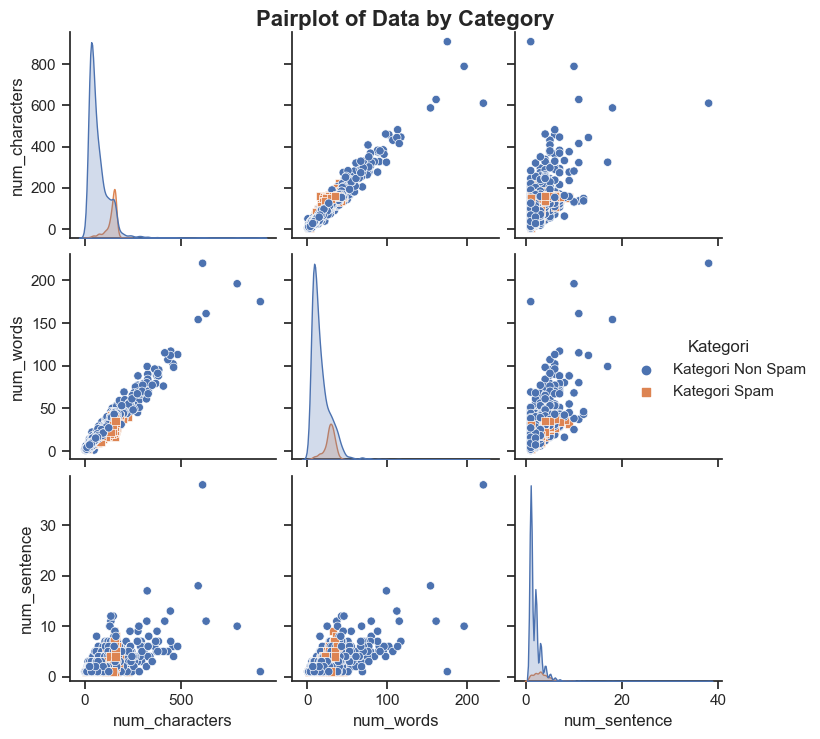

In [1022]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='Kategori', diag_kind='kde', markers=["o", "s"])

g.fig.suptitle("Pairplot of Data by Category", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  

g._legend.set_title('Kategori')
for t, l in zip(g._legend.texts, ["Kategori Non Spam", "Kategori Spam"]):
    t.set_text(l)

plt.show()

In [1023]:
df[['Kategori','num_characters', 'num_words', 'num_sentence']].corr()

,Kategori,num_characters,num_words,num_sentence
Kategori,1.000000,0.374409,0.255968,0.259023
num_characters,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sentence,0.259023,0.622428,0.679396,1.000000


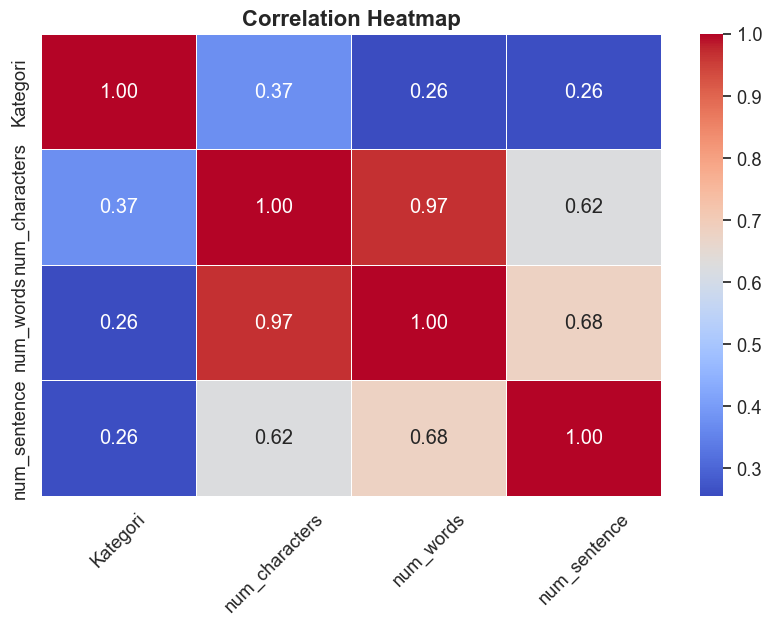

In [1024]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Kategori', 'num_characters', 'num_words', 'num_sentence']].corr()

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

plt.xticks(rotation=45)

plt.show()

### 6. Data Preprocessing

In [1025]:
from nltk.stem.porter import PorterStemmer

import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [1026]:
df['IsiPesanV2'] = df['IsiPesan'].apply(transform_text)

In [1027]:
styled_df = df.head(5).style

styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#0000FF"), ('font-weight', 'bold')]}
])

,Kategori,IsiPesan,num_characters,num_words,num_sentence,IsiPesanV2
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


### Seleksi Model

In [1028]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.IsiPesanV2, df.Kategori, test_size=0.2)

In [1029]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

tfid = TfidfVectorizer(max_features = 3000)

In [1030]:
X_train_np = X_train_cv.toarray()

In [1031]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [1032]:
X_test_cv = v.transform(X_test)

In [1033]:
 clfs = {
     'NB': mnb
 }

### Evaluasi Model

In [1034]:
# Initialize CountVectorizer for N-gram feature extraction
vectorizer = CountVectorizer(ngram_range=(1, 5))

# Fit and transform the training data
X_train_ngram = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_ngram = vectorizer.transform(X_test)

# Train a classifier
clf = MultinomialNB()
clf.fit(X_train_ngram, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test_ngram)

# Calculate accuracy for each N-gram
results = []
for n in range(1, 6):
    vectorizer_ngram = CountVectorizer(ngram_range=(n, n))
    X_train_ngram = vectorizer_ngram.fit_transform(X_train)
    X_test_ngram = vectorizer_ngram.transform(X_test)
    clf.fit(X_train_ngram, y_train)
    y_pred = clf.predict(X_test_ngram)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((n, accuracy))

# Print results
print("N-gram Akurasi")
for n, accuracy in results:
    print(f"{n} {accuracy:.2f}")


N-gram Akurasi
1 0.98
2 0.98
3 0.95
4 0.94
5 0.93


In [1035]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return precision, recall, f1

X_train, X_test, y_train, y_test = train_test_split(df['IsiPesan'], df['Kategori'], test_size=0.2, random_state=42)

clfs = {
    'MultinomialNB': MultinomialNB()
}

for name, clf in clfs.items():
    print(f"\nTraining {name}")
    print("N-gram\tPrecision\tRecall\tF1 Score")
    for n in range(1, 6):
        # Initialize CountVectorizer for N-gram feature extraction
        vectorizer = CountVectorizer(ngram_range=(n, n))

        # Fit and transform the training data
        X_train_ngram = vectorizer.fit_transform(X_train)

        # Transform the testing data
        X_test_ngram = vectorizer.transform(X_test)

        # Train a classifier
        precision, recall, f1 = train_classifier(clf, X_train_ngram, y_train, X_test_ngram, y_test)
        print(f"{n}\t{precision:.2f}\t\t{recall:.2f}\t{f1:.2f}")


Training MultinomialNB
N-gram	Precision	Recall	F1 Score
1	0.99		0.99	0.99
2	0.98		0.98	0.98
3	0.97		0.97	0.97
4	0.95		0.95	0.94
5	0.95		0.94	0.93


In [1040]:
emails_input = input("Masukkan email yang ingin diprediksi: ")
emails_count = v.transform([emails_input])
prediction = model.predict(emails_count)

print("Prediksi:", prediction[0])

Masukkan email yang ingin diprediksi:  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Prediksi: 1
